## 0. Poisson neurons

### 0.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from tqdm import tqdm

In [85]:
alpha = 2e-3 #V-1
beta=0.5e-3 #V
N=100
delta_t=0.1 #ms
tau=10 #ms
T=1000 #ms
R=1e+6 #Ohm
r_0=1 #ms
I_0=2e-9 #A
omega=1 #ms-1

In [69]:
def g(h, alpha=alpha, beta=beta):
    '''This function calculates the value of the transfer function g(h) of Poisson neurons given the values of h, alpha, and beta.
    
    Parameters:
    h (np.ndarray): The potential of every neuron
    alpha (float): The value of alpha used in the transfer function.
    beta (float): The value of beta used in the transfer function.
    '''

    return 1/(1 + np.exp(-2 * alpha * (h - beta)))

# Define the interval for h
h = np.linspace(-10, 10, 100)

# Define the initial values of alpha and beta
alpha_initial = 1.0
beta_initial = 0.0

# Create the interactive plot
@interact(alpha=(0.0, 2.0, 0.1), beta=(-1.0, 1.0, 0.1))
def plot_g(alpha=alpha_initial, beta=beta_initial):
    # Calculate the values of g(h) using the updated alpha and beta
    g_values = g(h, alpha, beta)
    
    # Plot the function g(h)
    plt.plot(h, g_values)
    plt.xlabel('h')
    plt.ylabel('g(h)')
    plt.title('Plot of g(h)')
    plt.grid(True)
    plt.show()


interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0), FloatSlider(value=0.0, description…

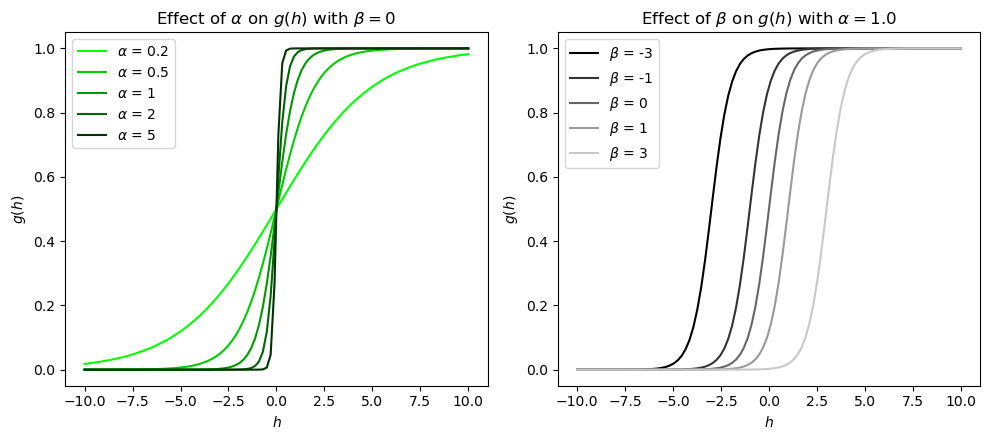

In [70]:
# Define the values for alpha and beta
alphas = [1/5, 1/2, 1, 2, 5]
alpha_colors = ['#00FF00', '#00CC00', '#009900', '#006600', '#003300']
betas  = [-3, -1, 0, 1, 3]
beta_colors = ['#000000', '#333333', '#666666', '#999999', '#C8C8C8']

# Create the figure and subplots
fig, (ax_alpha, ax_beta) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# Plot the curves with different colors and add legend
for i in range(len(alphas)):
    ax_alpha.plot(h, g(h, alphas[i], 0), color=alpha_colors[i], label = r'$\alpha$' + f' = {alphas[i]}')
    ax_beta.plot(h, g(h, 1.0, betas[i]), color=beta_colors[i], label = r'$\beta$' + f' = {betas[i]}')

# Set the title and labels for alpha
ax_alpha.set_title(r'Effect of $\alpha$ on $g(h)$ with $\beta = 0$')
ax_alpha.set_xlabel(r'$h$')
ax_alpha.set_ylabel(r'$g(h)$')
ax_alpha.legend()

# Set the title and labels for beta
ax_beta.set_title(r'Effect of $\beta$ on $g(h)$ with $\alpha = 1.0$')
ax_beta.set_xlabel(r'$h$')
ax_beta.set_ylabel(r'$g(h)$')
ax_beta.legend()

# Show the plot
plt.tight_layout()
plt.savefig('0_1.png', dpi=600)
plt.show()

### Q 0.1 :
Fig. 0.1 shows the effect of varying both α and β on the activation function.
From Fig. 0.1(a) it can be observed that the function varies between heaviside step function, for large value of alpha and a scaled linear function, for alpha=0. Alpha determines the steepness or slope of the sigmoid function. A larger alpha value results in a more abrupt transition from the lower to the upper plateau of the sigmoid function, while a smaller beta value leads to a smoother transition.

From Fig. 0.1(b), Beta determines the center of the sigmoid function along the x-axis.
Increasing beta shifts the center to the right, while decreasing it shifts the center to the left.

These parameters allows abetter control over the behavior of the sigmoid function, making it more or less sensitive to changes in the input, and shifting its midpoint along the x-axis.

### 0.2

In [89]:
def spike_simulation(N=N, delta_t=delta_t, tau=tau, T=T, R=R, r_0=r_0, I_0=I_0, omega=omega):
    """
    Simulates spike generation in a population of neurons.

    Parameters:
    - N (int): Number of neurons in the population.
    - delta_t (float): Time step size for simulation.
    - tau (float): Membrane time constant.
    - T (float): Total simulation time.
    - R (float): Resistance of the neuron.
    - r_0 (float): Baseline firing rate of the neuron.
    - I_0 (float): Amplitude of the input current.
    - omega (float): Frequency of the input current.

    Returns:
    - h (ndarray): membrane potential of each neuron over time.
    - mean_spikes (ndarray): mean spike occurence over 1 ms bins.
    """

    h = np.zeros((int(T/delta_t), N)) # e.g. (10000, 100)
    r = np.zeros((int(T/delta_t), N))
    p = np.zeros((int(T/delta_t), N))
    print('Potential shape:', h.shape)

    r[0, :] = r_0 * g(h[0, :])
    p[0, :] = r[0, :] * delta_t

    for t in tqdm(range(h.shape[0]-1)):
        # for n in range(h.shape[1]):
        h[t+1] = h[t] + delta_t/tau * (-h[t] + R * I_0 * np.sin(omega * t * delta_t))
        r[t+1] = r_0 * g(h[t+1])
        p[t+1] = r[t+1] * delta_t

    spikes = np.random.binomial(1, p).reshape((int(T), int(N/delta_t))) # e.g. (1000, 1000)
    mean_spikes = np.mean(spikes, axis=1) / delta_t

    return h, mean_spikes

In [83]:
potential_100, spikes_100 = spike_simulation()

Potential shape: (10000, 100)


100%|██████████| 9999/9999 [00:00<00:00, 97995.06it/s]


<Figure size 7200x2400 with 0 Axes>

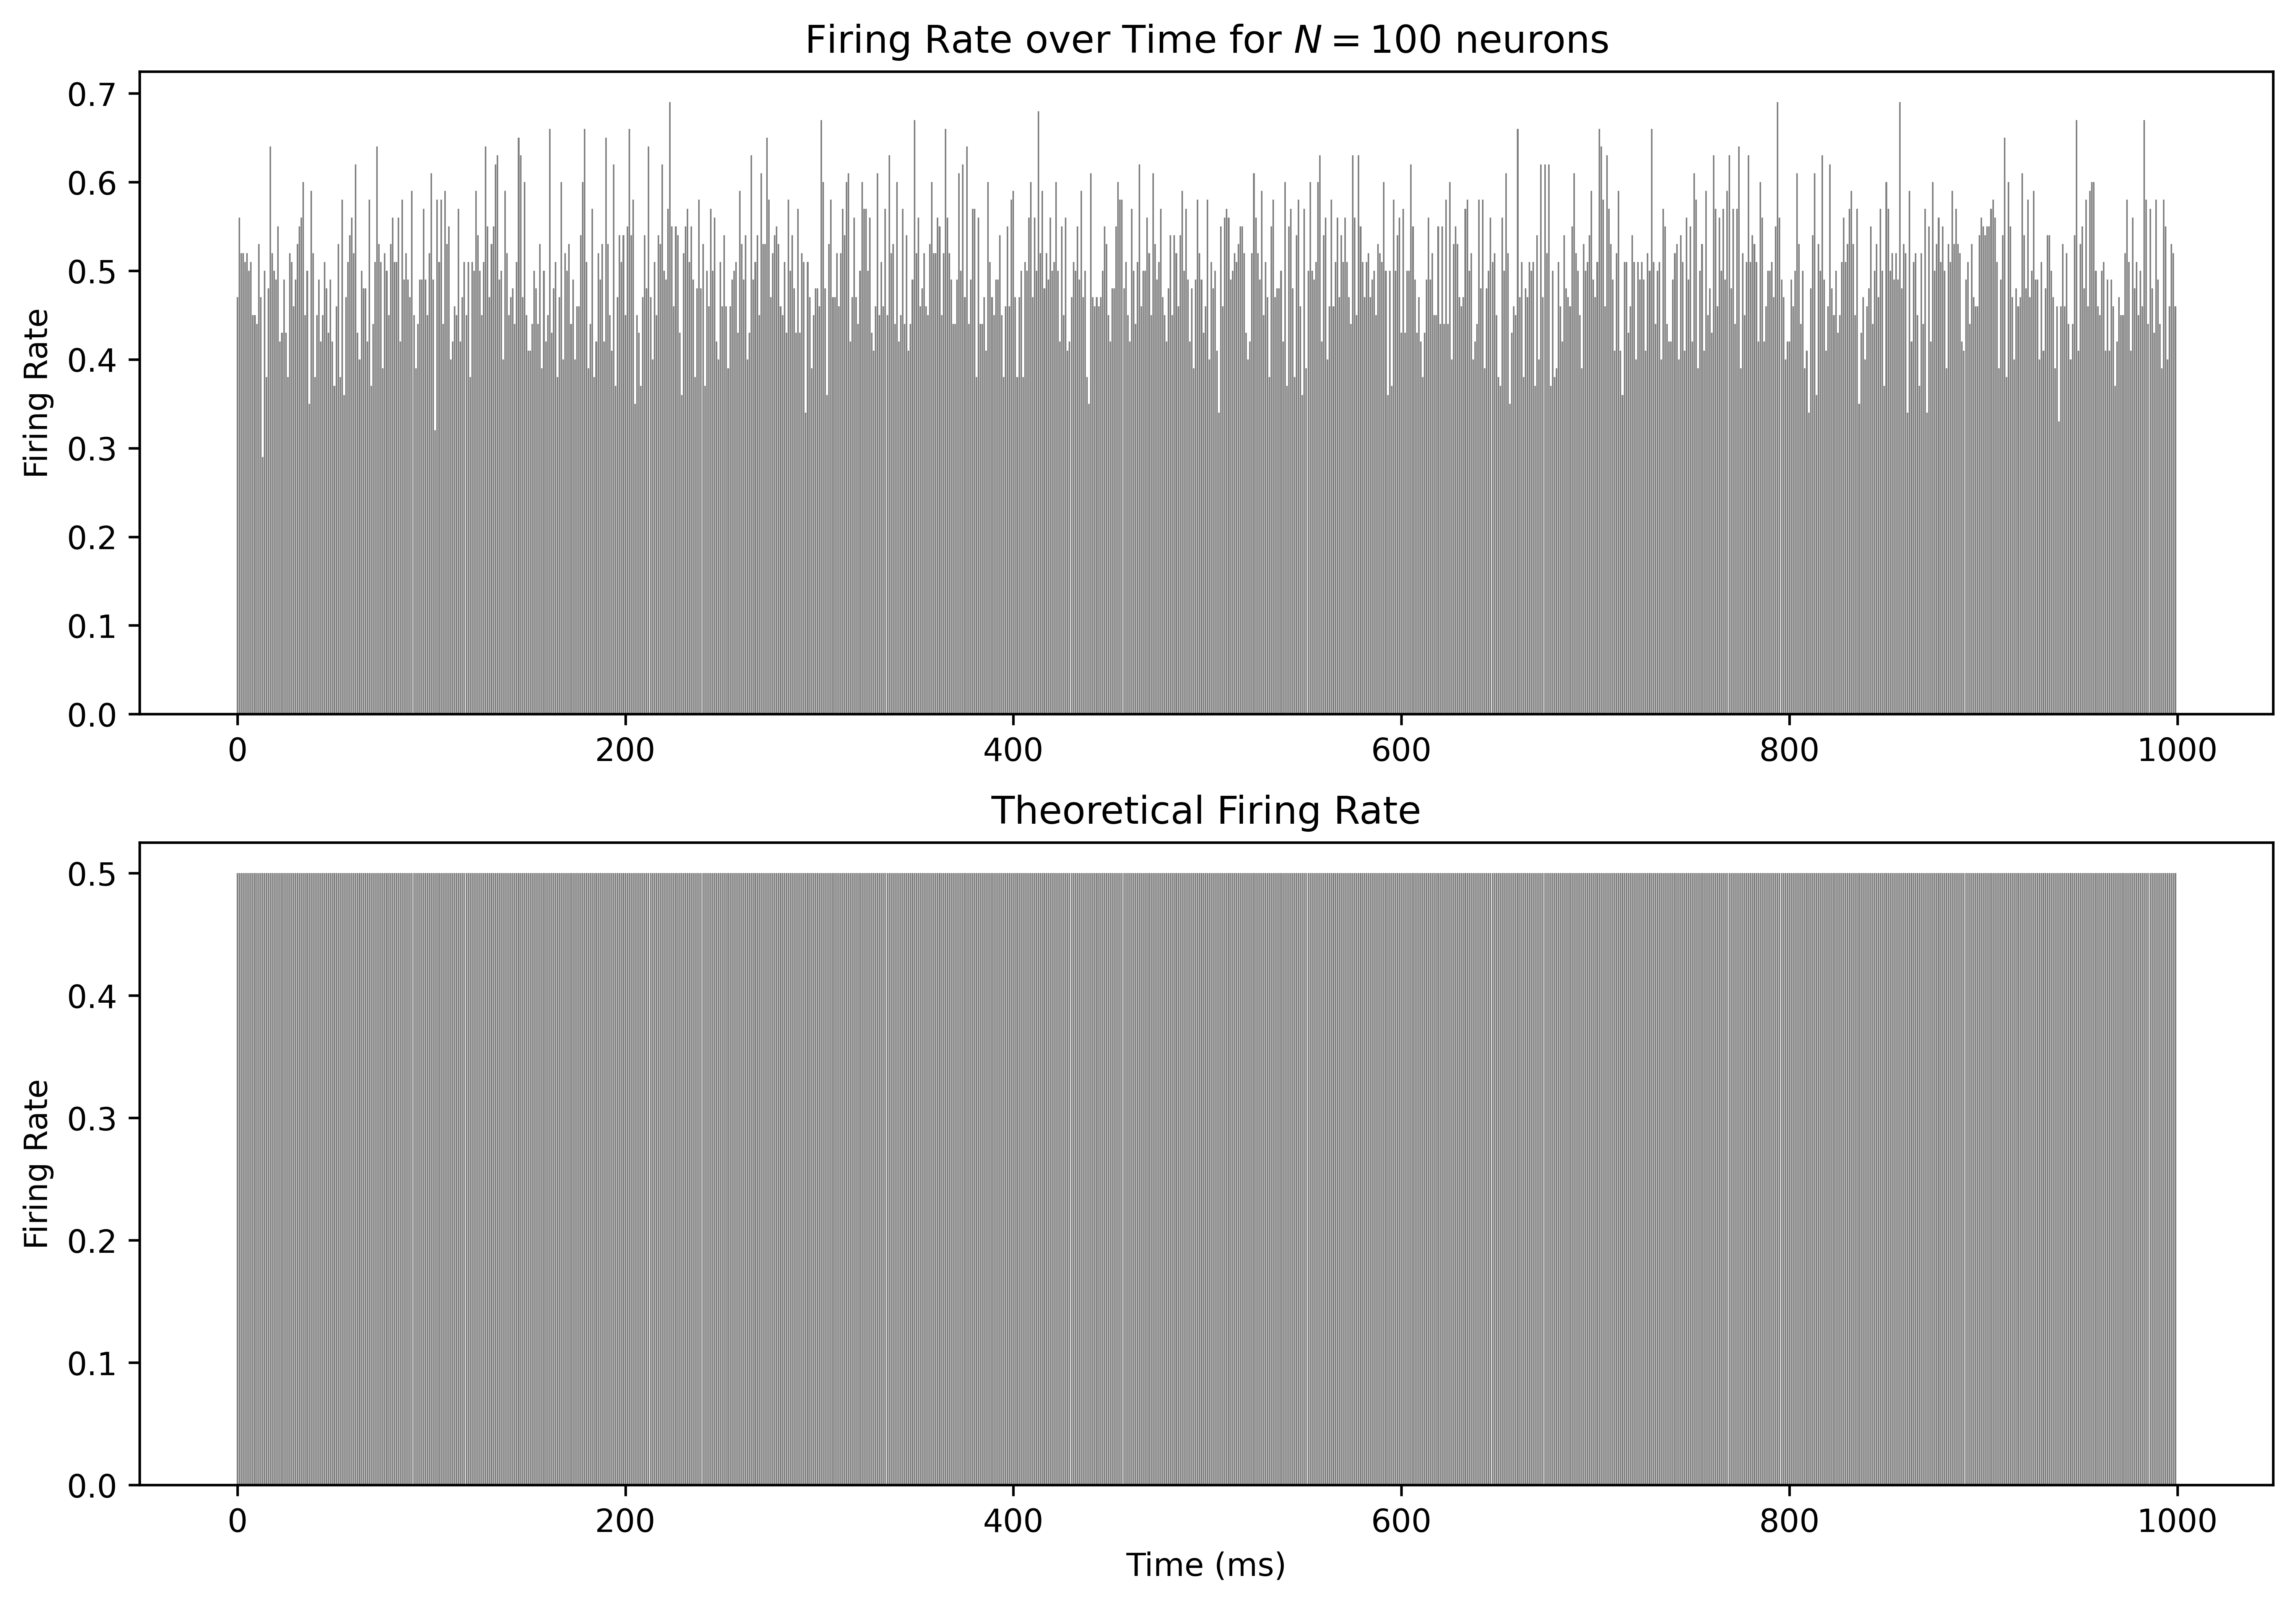

In [84]:
t = np.arange(T)
theoretical_firing_rate = r_0 * g(I_0 * np.sin(omega * t))

#create subplots
plt.figure(figsize=(12, 4), dpi=600)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), dpi=600)

ax1.bar(np.arange(len(spikes_100)), spikes_100, color='gray')
ax1.set_ylabel('Firing Rate')
ax1.set_title(r'Firing Rate over Time for $N=100$ neurons')

ax2.bar(t, theoretical_firing_rate, color='gray')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Firing Rate')
ax2.set_title(r'Theoretical Firing Rate')
plt.show()

Potential shape: (10000, 1000)


100%|██████████| 9999/9999 [00:00<00:00, 44138.12it/s]


<Figure size 7200x2400 with 0 Axes>

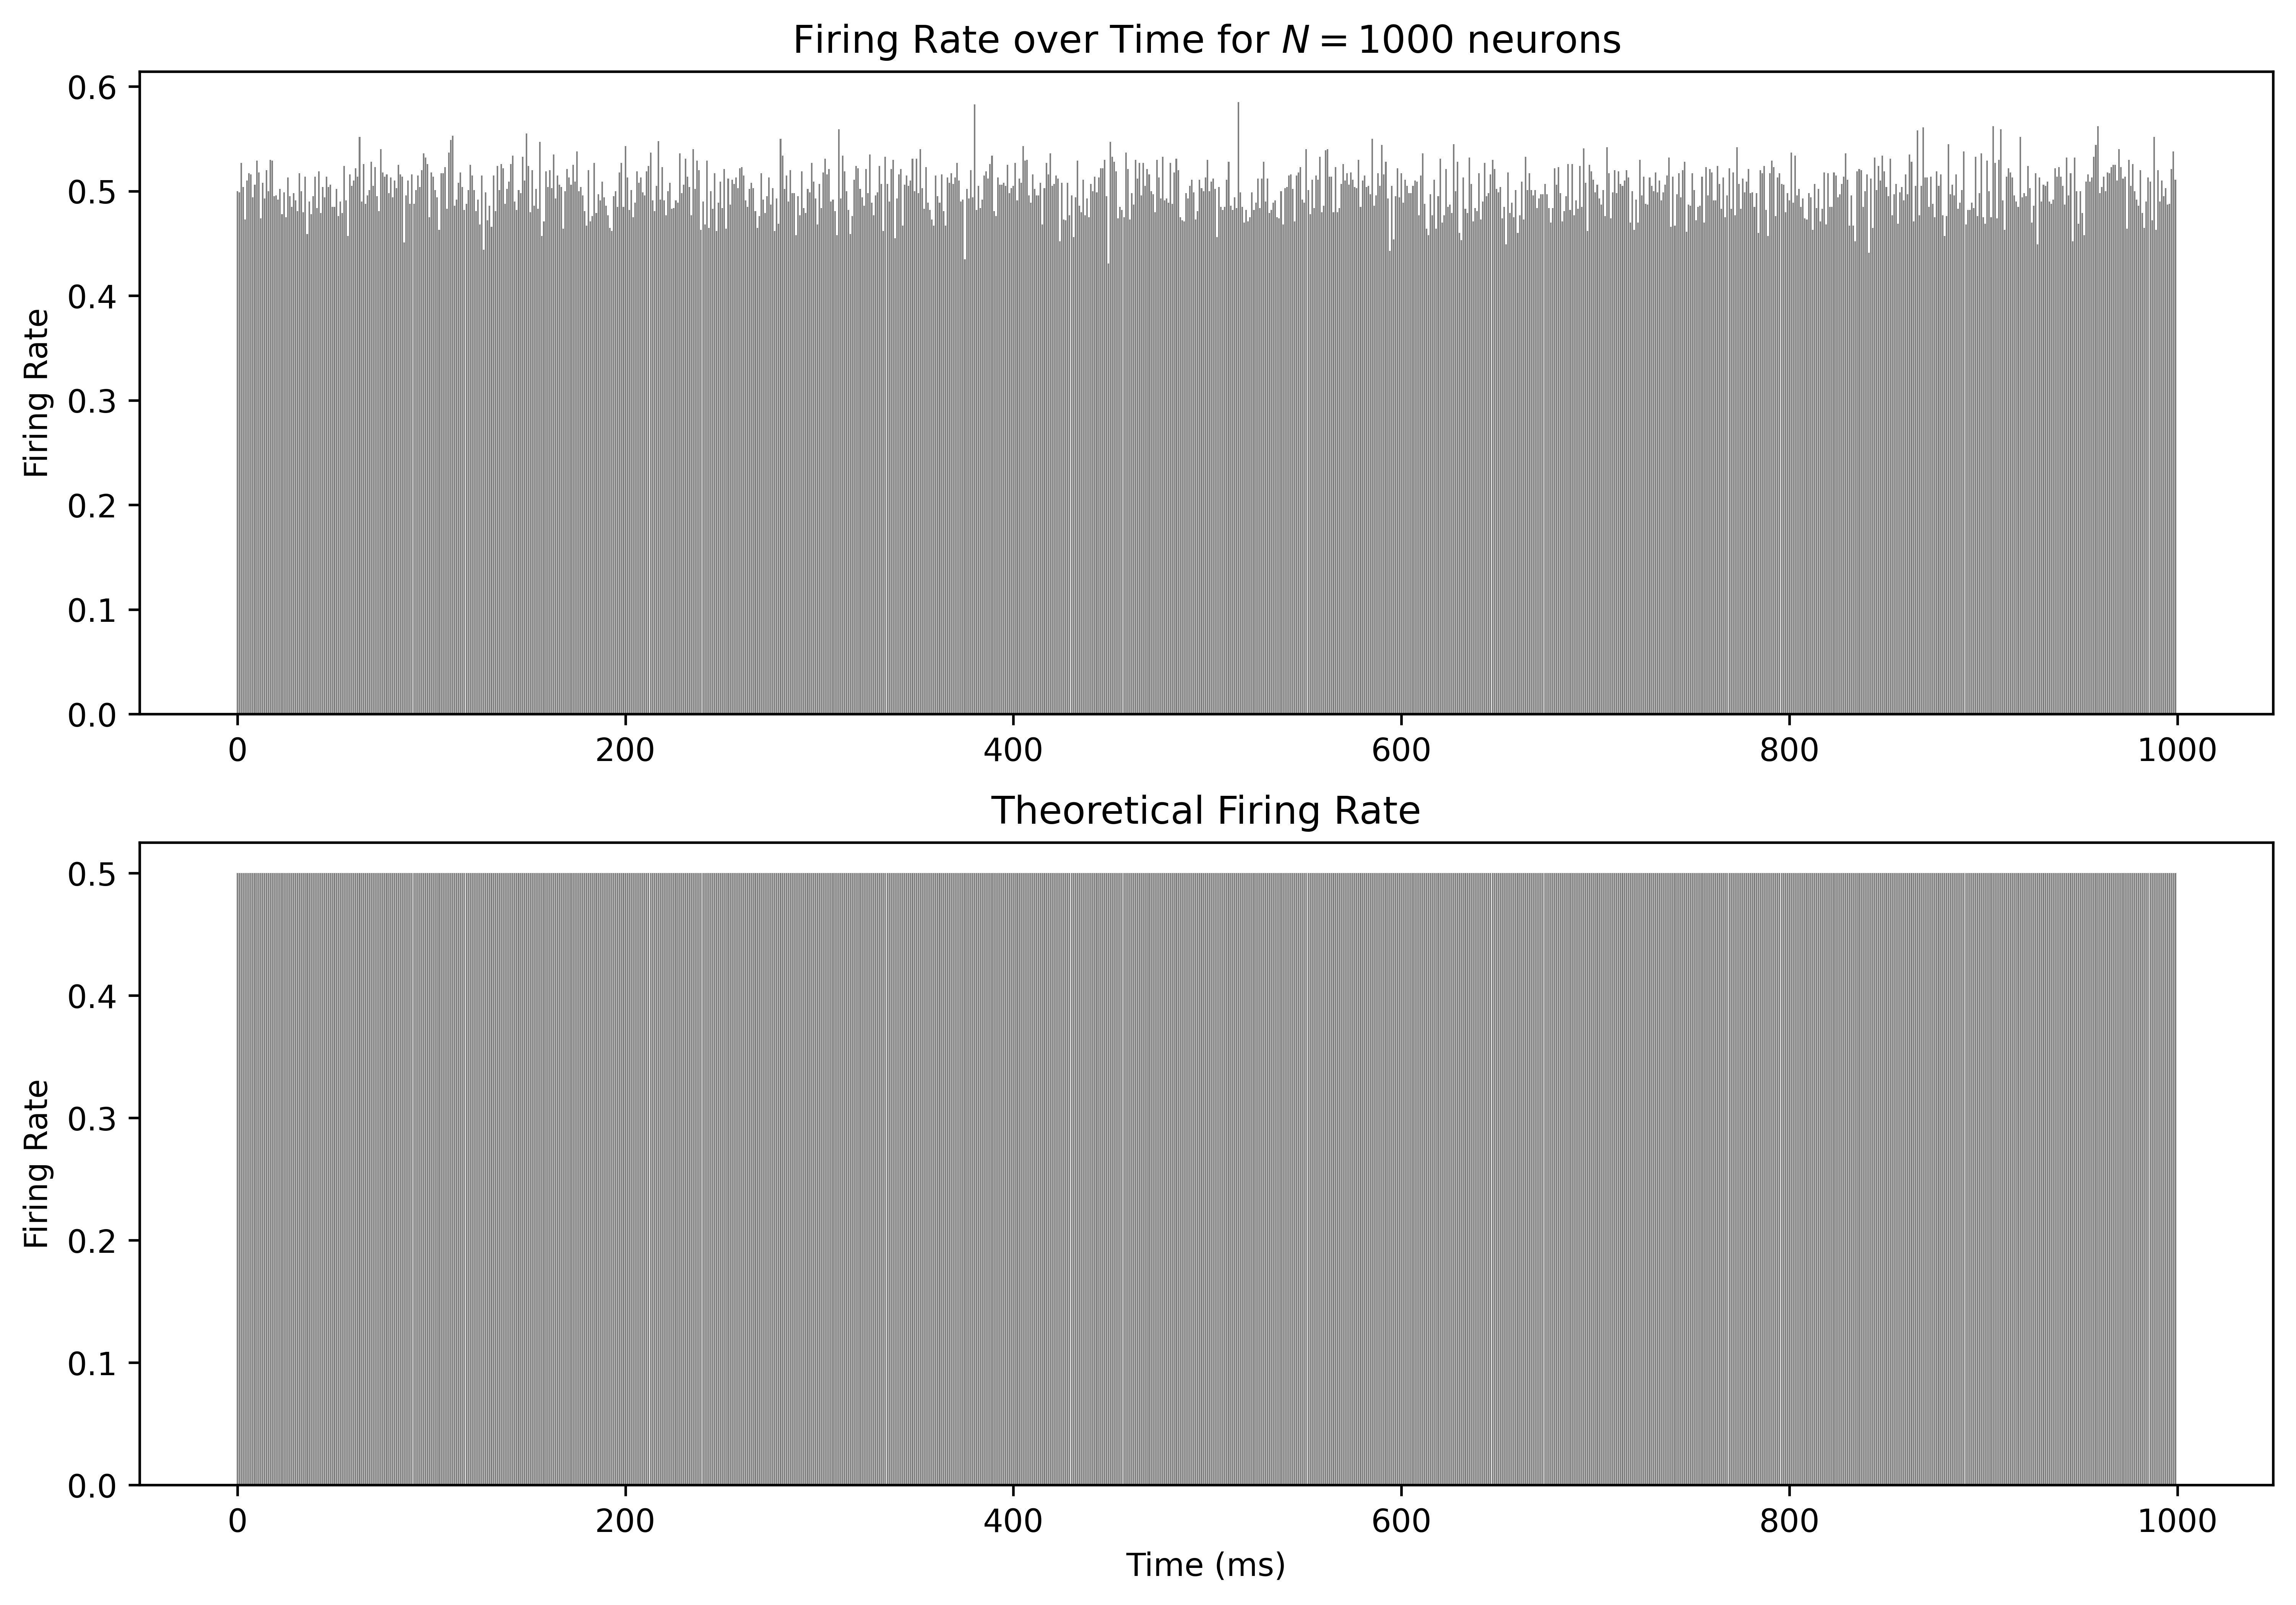

In [86]:
potential_1000, spikes_1000 = spike_simulation(N=1000)

#create subplots
plt.figure(figsize=(12, 4), dpi=600)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), dpi=600)

ax1.bar(np.arange(len(spikes_1000)), spikes_1000, color='gray')
ax1.set_ylabel('Firing Rate')
ax1.set_title(r'Firing Rate over Time for $N=1000$ neurons')

ax2.bar(t, theoretical_firing_rate, color='gray')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Firing Rate')
ax2.set_title(r'Theoretical Firing Rate')
plt.show()

### Q 0.2 : 

- With only 100 neurons, there is noticeable differences between the mean firing rate obtained from simulation and the theoretical rate. The observed mean firing rate from simulation varying between 0.3 and 0.7, while the theoretical rate remains constant at 0.5. This is because the number of neurons is relatively small, and statistical fluctuations play a significant role.

- As we increase the number of neurons to 1000, the mean firing rate obtained from simulation tends to converge closer to the theoretical rate. The observed mean firing rate from simulation varying between 0.45 and 0.55, while the theoretical rate remains constant at 0.5 This is because with more neurons, the law of large numbers ensures that the average behavior of the neurons more closely matches the theoretical predictions.

# Ex 1. Bump attractor